In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import pandas as pd


In [4]:
x_dt = np.linspace(0.0,10.0,1000000)


In [5]:
noise = np.random.randn(1000000)

In [6]:
y_tr = (0.5 * x_dt) + 5 + noise

In [7]:
x_df = pd.DataFrame(data= x_dt,columns = ['x_data'])

In [8]:
y_df = pd.DataFrame(data= y_tr,columns = ['y_data'])

In [9]:
x_df.head()

,x_data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [11]:
my_data.head()

,x_data,y_data
0,0.00000,4.572133
1,0.00001,3.808721
2,0.00002,4.952724
3,0.00003,5.676698
4,0.00004,5.610689


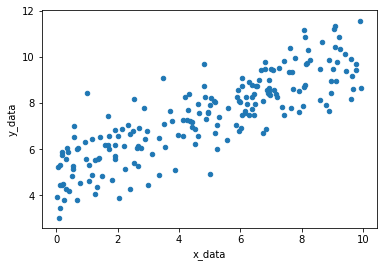

In [12]:
my_data.sample(n = 200).plot(kind ='scatter',x='x_data',y='y_data')

In [13]:
batch = 16
rand = np.random.rand(2)
rand

array([0.01063889, 0.5169945 ])

In [14]:
m = tf.Variable(0.03854426)
b = tf.Variable(0.40798026)

In [15]:
x_in = tf.placeholder(tf.float32,[batch])
y_in = tf.placeholder(tf.float32,[batch])

In [16]:
y_line = m*x_in + b

In [17]:
loss = tf.reduce_sum(tf.square(y_in-y_line))

In [18]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [19]:
train = opt.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000

    for i in range(batches):
        rand_ind = np.random.randint(len(x_dt),size = batch)
        
        feed = {x_in:x_dt[rand_ind],y_in:y_tr[rand_ind]}
        
        sess.run(train,feed_dict = feed)
    m_fit,b_fit = sess.run(([m,b]))
    
    

In [22]:
y_pl = x_dt*m_fit + b_fit

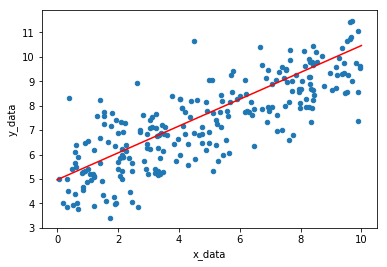

In [23]:
my_data.sample(250).plot(kind='scatter',x = 'x_data',y='y_data')
plt.plot(x_dt,y_pl,'r')

 ## TF Estimator API

In [24]:
feat = [tf.feature_column.numeric_column(key='x',shape=[1])]

In [27]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_master': '', '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmpnpnsvb0f', '_protocol': None, '_save_checkpoints_steps': None, '_experimental_distribute': None, '_task_type': 'worker', '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 1, '_service': None, '_is_chief': True, '_train_distribute': None, '_log_step_count_steps': 100, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f387b471518>, '_device_fn': None, '_eval_distribute': None, '_task_id': 0, '_save_summary_steps': 100, '_evaluation_master': ''}


In [28]:
from sklearn.model_selection import train_test_split


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_dt,y_tr,test_size=0.3,random_state=101)

In [43]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [39]:
train_input_function = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [41]:
eval_input_function = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [36]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnpnsvb0f/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpnpnsvb0f/model.ckpt.
INFO:tensorflow:loss = 1.9093956, step = 1001
INFO:tensorflow:global_step/sec: 608.666
INFO:tensorflow:loss = 2.8124292, step = 1101 (0.167 sec)
INFO:tensorflow:global_step/sec: 736.917
INFO:tensorflow:loss = 10.995325, step = 1201 (0.134 sec)
INFO:tensorflow:global_step/sec: 443.517
INFO:tensorflow:loss = 8.148247, step = 1301 (0.225 sec)
INFO:tensorflow:global_step/sec: 723.906
INFO:tensorflow:loss = 6.2129493, step = 1401 (0.139 sec)
INFO:tensorflow:global_step/sec: 728.285
INFO:tensorflow:loss = 16.664047, step = 1501 (0.136 sec)
INFO:tensorflow:global_step/sec: 717.378
INFO:tensorflow:loss = 3.0996

In [37]:
train_met = estimator.evaluate(input_fn=train_input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-01-00:00:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnpnsvb0f/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-01-00:00:51
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0005232, global_step = 2000, label/mean = 7.502346, loss = 8.004186, prediction/mean = 7.40689
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: 

In [42]:
eval_metrics = estimator.evaluate(input_fn=eval_input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-01-00:03:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnpnsvb0f/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-03-01-00:03:15
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0188545, global_step = 2000, label/mean = 7.4614415, loss = 8.150836, prediction/mean = 7.388737
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000

In [44]:
print('Training Metrics')
print(train_met)

Training Metrics
{'average_loss': 1.0005232, 'loss': 8.004186, 'global_step': 2000, 'prediction/mean': 7.40689, 'label/mean': 7.502346}


In [45]:
print('Evaluation Metrics')
print(eval_metrics)

Evaluation Metrics
{'average_loss': 1.0188545, 'loss': 8.150836, 'global_step': 2000, 'prediction/mean': 7.388737, 'label/mean': 7.4614415}


In [46]:
new_data = np.linspace(0,10,10)


input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)

In [50]:
preds = list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnpnsvb0f/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [51]:
preds

[{'predictions': array([4.893114], dtype=float32)},
 {'predictions': array([5.4514794], dtype=float32)},
 {'predictions': array([6.0098443], dtype=float32)},
 {'predictions': array([6.5682096], dtype=float32)},
 {'predictions': array([7.1265745], dtype=float32)},
 {'predictions': array([7.6849394], dtype=float32)},
 {'predictions': array([8.243305], dtype=float32)},
 {'predictions': array([8.80167], dtype=float32)},
 {'predictions': array([9.360035], dtype=float32)},
 {'predictions': array([9.9184], dtype=float32)}]

In [52]:
predicts = []

for pred in preds:
    predicts.append(pred['predictions'])

In [53]:
predicts

[array([4.893114], dtype=float32),
 array([5.4514794], dtype=float32),
 array([6.0098443], dtype=float32),
 array([6.5682096], dtype=float32),
 array([7.1265745], dtype=float32),
 array([7.6849394], dtype=float32),
 array([8.243305], dtype=float32),
 array([8.80167], dtype=float32),
 array([9.360035], dtype=float32),
 array([9.9184], dtype=float32)]

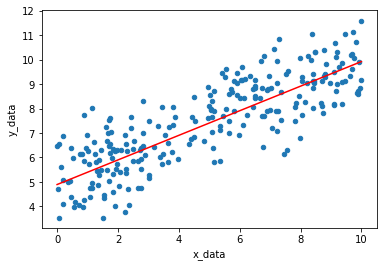

In [58]:
my_data.sample(n=250).plot(kind = 'scatter',x='x_data',y='y_data')
plt.plot(new_data,predicts,'r')

ValueError: x and y must be the same size

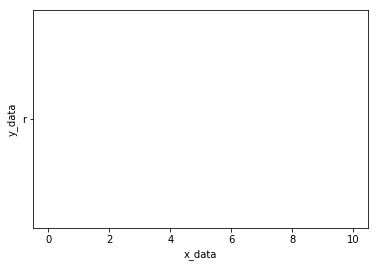

In [59]:
my_data.sample(n=250).plot(kind = 'scatter',x='x_data',y='y_data')
plt.scatter([new_data,predicts],'r')